<a href="https://colab.research.google.com/github/TurinShayla/Python-Graph-Brain/blob/main/SUS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [ ]:
#get the url
wb = gc.open_by_key('1SWN0twJvQHvM7_e5LFVMcTVoZ75EZl_YYkyXBeoGS8c')
#get the file
ws = wb.worksheet('SUS')

# get_all_values gives a list of rows.
rows = ws.get_all_values()
#print(rows)

In [ ]:
import pandas as pd
from scipy.stats import sem
#df=pd.DataFrame.from_records(rows)
df=pd.DataFrame.from_records(rows[1:],columns=rows[0])
print(df)

         ID  Condition Q1 Q2 Q3 Q4 Q5 Q6 Q7 Q8 Q9 Q10
0    SU6052   Game (G)  4  2  4  1  4  1  4  1  5   1
1    MA9343   Game (G)  3  2  4  3  3  1  4  1  3   3
2    MY8520  Video (V)  3  4  4  3  4  2  4  3  4   4
3    RW9053  Video (V)  3  2  4  4  4  2  4  2  4   4
4   NAF5164   Game (G)  4  3  3  4  4  2  4  3  2   2
5    sy8932  Video (V)  1  1  5  5  4  3  4  3  3   5
6    DH6641  Video (V)  2  3  3  4  3  3  4  3  3   2
7    DH5341   Game (G)  4  2  4  2  4  2  4  2  4   2
8    KA9055   Game (G)  4  2  4  2  4  2  4  3  4   2
9    DH3764   Game (G)  2  4  4  3  4  3  4  4  3   3
10   DH9191  Video (V)  4  1  4  2  4  2  4  1  4   1
11   NA1730  Video (V)  3  2  4  3  4  3  4  2  4   2


In [ ]:
grouped=df.groupby(df.Condition)
df_video=grouped.get_group("Video (V)")
df_game=grouped.get_group("Game (G)")

In [ ]:
def calculate_sus(df):
    """Calculate SUS scores for each response in the DataFrame"""
    sus_scores = []
    for _, row in df.iterrows():
        sus_score = 0
        for i in range(2, 12):  # Adjusted for additional columns
            q = f'Q{i-1}'
            if (i+1) % 2 == 0:  # even-numbered question
                sus_score += 5 - row[q]
            else:  # odd-numbered question
                sus_score += row[q] - 1
        sus_scores.append(sus_score * 2.5)
    return sus_scores


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Convert all columns to numeric
df_video = df_video.apply(pd.to_numeric, errors='coerce')
# Convert all columns to numeric
df_game = df_game.apply(pd.to_numeric, errors='coerce')
#print(df_game)


In [ ]:
# Add SUS scores to each DataFrame
df_video['SUS_Score'] = calculate_sus(df_video)
df_game['SUS_Score'] = calculate_sus(df_game)

# Now that each DataFrame has SUS scores, you can calculate the average SUS score and plot
game_sus = df_game['SUS_Score'].mean()
video_sus = df_video['SUS_Score'].mean()
game_std=df_game['SUS_Score'].std()
video_std=df_video['SUS_Score'].std()
game_se=sem(df_game['SUS_Score'])
video_se=sem(df_video['SUS_Score'])
# Create a DataFrame for the means
print(game_std,video_std)


13.291601358251258 12.315302134607444


In [ ]:
def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')



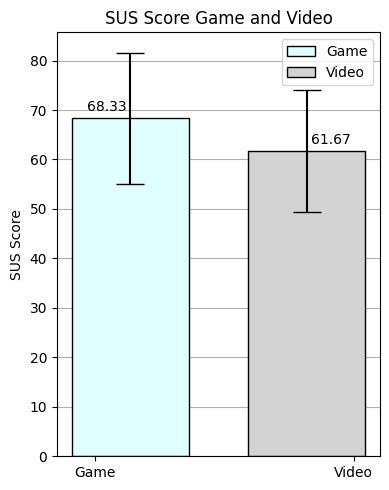

In [ ]:
pre_mean,pre_std=(round(game_sus,2)),(game_std)
post_mean,post_std=(round(video_sus,2)),(video_std)

ind = 0.5  # the x locations for the groups
width = 0.25  # the width of the bars
fig, ax = plt.subplots(figsize=(4, 5))
#ig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, pre_mean, width, yerr=pre_std,
                label='Game',        capsize=10,
       color=['lightcyan'],edgecolor='black',zorder=2)
rects2 = ax.bar(ind + width, post_mean, width, yerr=post_std,
                label='Video',        capsize=10,
       color=['lightgray'],edgecolor='black',zorder=2)


ax.set_ylabel('SUS Score')
#set the label position
ax.set_xticks([0.3,0.85])
ax.set_xticklabels(['Game','Video'])

ax.set_title('SUS Score Game and Video')
ax.yaxis.grid(True)
ax.legend()

autolabel(rects1, "left")
autolabel(rects2, "right")

# Save the figure and show
plt.tight_layout()
plt.savefig('SUS.jpg',dpi=900)
plt.savefig('SUS.pdf',dpi=1300)
#adjust position of x-axis label


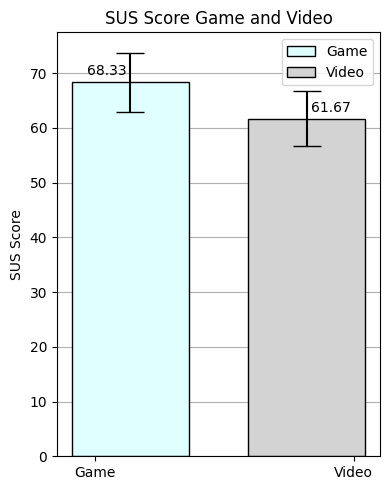

In [ ]:
pre_mean,pre_std=(round(game_sus,2)),(game_se)
post_mean,post_std=(round(video_sus,2)),(video_se)

ind = 0.5  # the x locations for the groups
width = 0.25  # the width of the bars
fig, ax = plt.subplots(figsize=(4, 5))
#ig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, pre_mean, width, yerr=pre_std,
                label='Game',        capsize=10,
       color=['lightcyan'],edgecolor='black',zorder=2)
rects2 = ax.bar(ind + width, post_mean, width, yerr=post_std,
                label='Video',        capsize=10,
       color=['lightgray'],edgecolor='black',zorder=2)


ax.set_ylabel('SUS Score')
#set the label position
ax.set_xticks([0.3,0.85])
ax.set_xticklabels(['Game','Video'])

ax.set_title('SUS Score Game and Video')
ax.yaxis.grid(True)
ax.legend()

autolabel(rects1, "left")
autolabel(rects2, "right")

# Save the figure and show
plt.tight_layout()
plt.savefig('SUS.jpg',dpi=900)
plt.savefig('SUS.pdf',dpi=1300)
#adjust position of x-axis label

In [ ]:
import scipy.stats as stats

# Define the columns for ANOVA and t-test
column_definition = 'SUS_Score'
column_quiz = 'SUS_Score'

# Extract the data from the DataFrames
data_definition = df_video['SUS_Score']
data_quiz = df_game['SUS_Score']

# One-way ANOVA
f_value, p_value_anova = stats.f_oneway(data_definition, data_quiz)
if p_value_anova <= 0.05:
    print("ANOVA result: statistically significant (p-value ≤ 0.05)")
else:
    print("ANOVA result: not statistically significant (p-value > 0.05)")

# Independent samples t-test
t_value, p_value_ttest = stats.ttest_ind(pd.to_numeric(data_definition),pd.to_numeric(data_quiz))
if p_value_ttest <= 0.05:
    print("t-test result: statistically significant (p-value ≤ 0.05)")
else:
    print("t-test result: not statistically significant (p-value > 0.05)")


# Print ANOVA result in APA style
anova_result = f"One-way ANOVA: F({len(data_definition)-1}, {len(data_quiz)-1}) = {f_value:.2f}, p = {p_value_anova:.3f}"
print("ANOVA result (APA style):")
print(anova_result)
print()

# Print t-test result in APA style
ttest_result = f"Independent samples t-test: t({len(data_definition)+len(data_quiz)-2}) = {t_value:.2f}, p = {p_value_ttest:.3f}"
print("t-test result (APA style):")
print(ttest_result)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
x = ['A', 'B', 'C', 'D']
y = [10, 20, 15, 25]

# Set the desired figure size
fig, ax = plt.subplots(figsize=(8, 6))

# Set the desired width of the bars
width = 0.5

# Create a bar plot
ax.bar(x, y, width)

# Set other plot properties
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Bar Chart')

# Adjust y-axis limits (optional)
ax.set_ylim(0, max(y) + 5)

# Adjust spines (optional)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.show()
